In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

rng = np.random.default_rng(42)

# 1. Generating Data

For the data, when we generating them, we assume the means are all-zero, but we still may need to center them, since they are random scatter data.

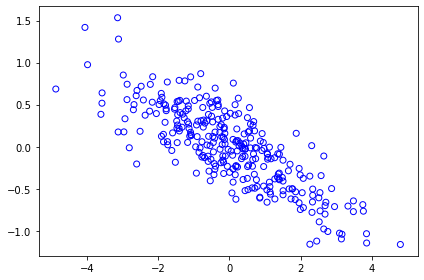

In [2]:
# generating some data
mean_vec = np.zeros((2, ))
cov_mat = np.array(
    [[2.0, 1.25], 
     [1.25, 0.9]]
)
random_data = rng.multivariate_normal(mean=mean_vec, cov=cov_mat, size=300)
random_data = StandardScaler(with_std=False).fit_transform(random_data)
rotate_angle = -np.pi/4
rotate_mat = np.array(
    [[np.cos(rotate_angle), -np.sin(rotate_angle)], 
     [np.sin(rotate_angle), np.cos(rotate_angle)]]
)
random_data = np.matmul(random_data, rotate_mat.T)

fig, ax = plt.subplots()

ax.scatter(random_data[:, 0], random_data[:, 1], fc='none', ec='blue', label='data')

plt.tight_layout()

# 2. Eigenvalues and Eigenvectors

In [3]:
eigen_values, eigen_vectors = np.linalg.eig(np.cov(random_data.T))
print("Eigenvalues are:")
print(eigen_values)
print("Eigenvectors are:")
print(eigen_vectors)

Eigenvalues are:
[2.80349452 0.07461105]
Eigenvectors are:
[[ 0.97316496  0.2301086 ]
 [-0.2301086   0.97316496]]


In [4]:
def draw_vector(ax, vec_from, vec_to, color):
    ax.annotate(
        '', vec_to, vec_from, arrowprops=dict(
            arrowstyle='->', linewidth=2.5, shrinkA=0, shrinkB=0, color=color
        ), label='cool'
    )

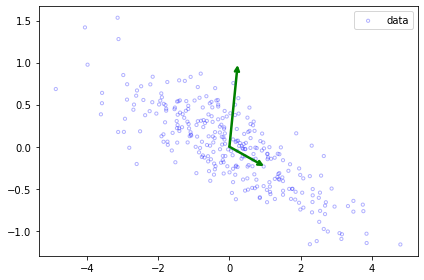

In [5]:
# visualization
fig, ax = plt.subplots()

ax.scatter(random_data[:, 0], random_data[:, 1], s=10,  fc='none', ec='blue', alpha=0.3, label='data')
draw_vector(ax, random_data.mean(axis=0), random_data.mean(axis=0)+eigen_vectors[:, 0], color='green')
draw_vector(ax, random_data.mean(axis=0), random_data.mean(axis=0)+eigen_vectors[:, 1], color='green')
ax.legend()

plt.tight_layout()

# 3. PCA

In [6]:
PCA_obj = PCA(random_state=10).fit(random_data)
transformed_random_data = PCA_obj.transform(random_data)
print("Components are:")
print(PCA_obj.components_)

Components are:
[[ 0.97316496 -0.2301086 ]
 [-0.2301086  -0.97316496]]


If we visualize components and eigenvectors together:

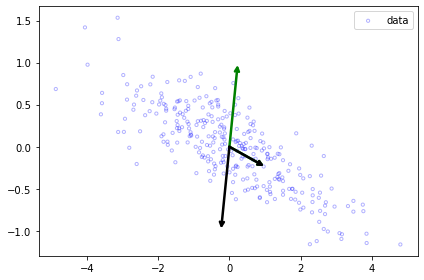

In [7]:
fig, ax = plt.subplots()

ax.scatter(random_data[:, 0], random_data[:, 1], s=10,  fc='none', ec='blue', alpha=0.3, label='data')
draw_vector(ax, random_data.mean(axis=0), random_data.mean(axis=0)+eigen_vectors[:, 0], color='green')
draw_vector(ax, random_data.mean(axis=0), random_data.mean(axis=0)+eigen_vectors[:, 1], color='green')
draw_vector(ax, random_data.mean(axis=0), random_data.mean(axis=0)+PCA_obj.components_[0, :], color='black')
draw_vector(ax, random_data.mean(axis=0), random_data.mean(axis=0)+PCA_obj.components_[1, :], color='black')
ax.legend()

plt.tight_layout()

From the visualization above, we can clearly see the PCA transformation direction is aligned with the eigenvectors.

Essentially,
- PCA components <-> Eigenvectors
- PCA explained variance <-> Eigenvectors <-> Variance of Transformed Data with delta dof 1

Since eigenvector represents the transformation direction on the original axis, we can say how much each original feature contributes to the transformation.
Let's take component No.1 as the example:

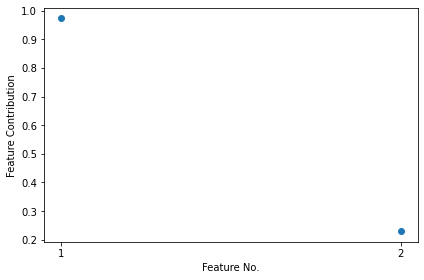

In [25]:
plt.scatter([1, 2], np.abs(PCA_obj.components_[0, :]))
plt.ylabel('Feature Contribution')
plt.xlabel('Feature No.')
plt.xticks([1, 2])
plt.tight_layout()